# Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV


# Load Dataset

In [3]:
df=pd.read_csv("House Price.csv")
df.head(20)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [4]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

# Dropping Irrelevent Columns

In [5]:
df=df.drop(["Id"], axis=1)
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# Performing EDA

In [6]:
df.shape

(2000, 9)

In [7]:
df.info()  #To get complete information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [8]:
df.describe()   #Statistical Description of Dataset

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [9]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

**No Missing Values**

In [10]:
df.duplicated().sum()

0

**No Duplicated Values**

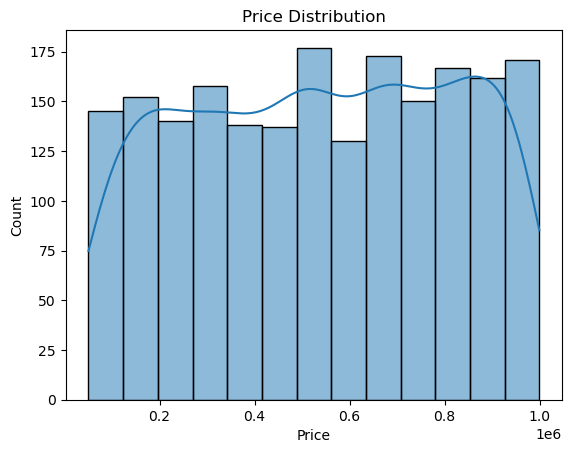

In [11]:
# Price distribution
figsize=(14, 10)
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

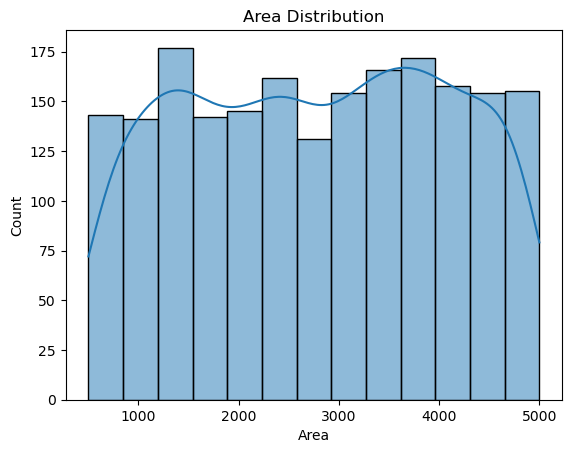

In [12]:
# Space distribution
sns.histplot(df["Area"], kde=True)
plt.title("Area Distribution")
plt.show()

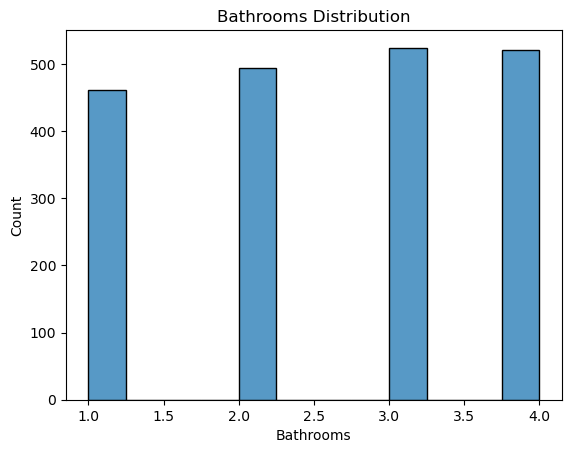

In [13]:
# Distribution of the number of bathrooms
sns.histplot(df["Bathrooms"], kde=False)
plt.title("Bathrooms Distribution")
plt.show()

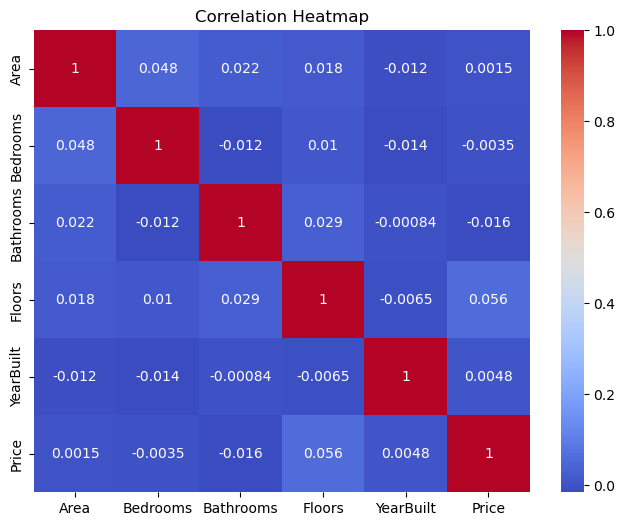

In [14]:
# Correlation heatmap to check the relation among features
numeric_cols = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Price"]
correlation = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**The effect of qualitative variables on the price**

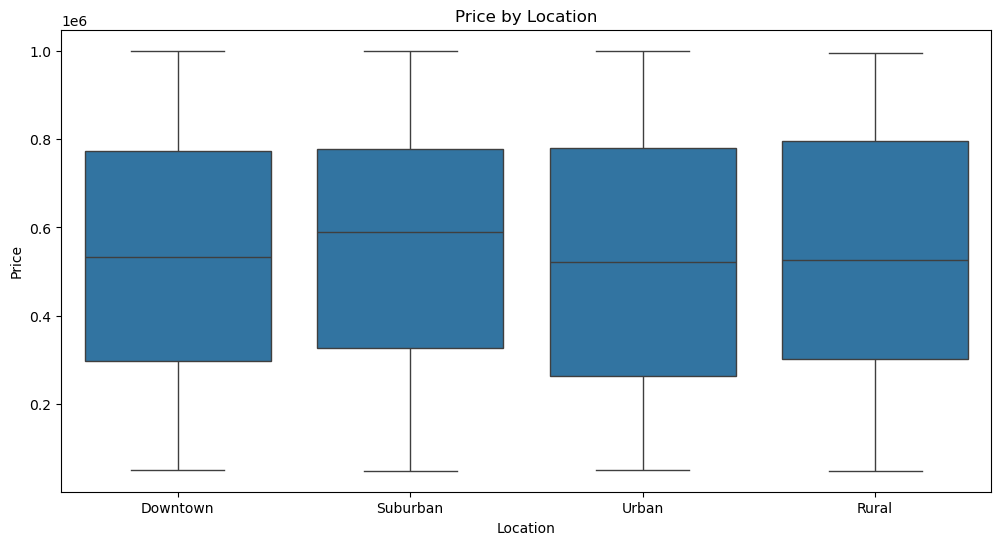

In [15]:
# Effect of Location
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="Price", data=df)
plt.title("Price by Location")
plt.show()

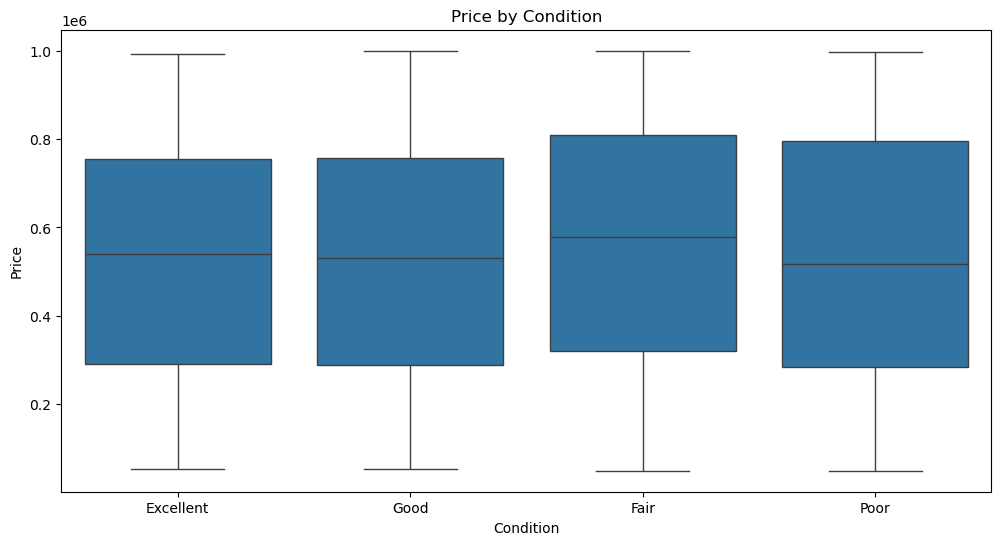

In [16]:
# Effect of Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x="Condition", y="Price", data=df)
plt.title("Price by Condition")
plt.show()

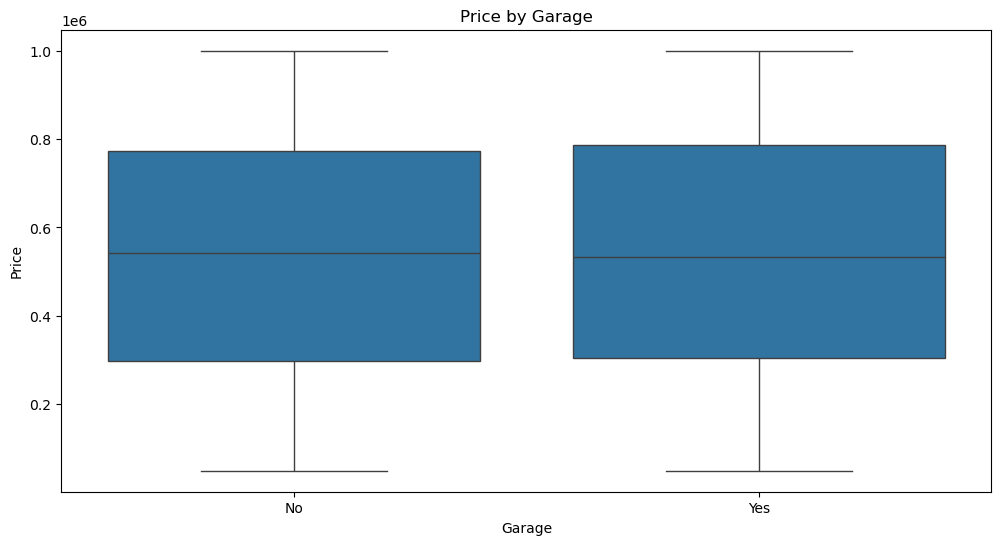

In [17]:
# Effect of Garage
plt.figure(figsize=(12, 6))
sns.boxplot(x="Garage", y="Price", data=df)
plt.title("Price by Garage")
plt.show()

# Checking Outliers

In [18]:
Q1=df["Price"].quantile(0.25)
Q3=df["Price"].quantile(0.75)
IQR=Q3-Q1
outliers=df[(df["Price"] < (Q1 - 1.5 * IQR)) | (df["Price"] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 0


# Feature Engineering

In [19]:
# Log transform of oblique features
df["Log_SalePrice"]=np.log1p(df["Price"])

# Creating new features
df["TotalRooms"]=df["Bedrooms"] + df["Bathrooms"]
df["HouseAge"]=2025-df["YearBuilt"]
df["IsMultiFloor"]=(df["Floors"] > 1).astype(int)

# Normalization

In [20]:
scaler=StandardScaler()
numeric_cols=["Area", "TotalRooms", "HouseAge"]
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])

df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Log_SalePrice,TotalRooms,HouseAge,IsMultiFloor
0,-1.101471,5,4,3,1970,Downtown,Excellent,No,149919,11.917857,1.919307,-0.238155,1
1,1.147485,5,4,3,1958,Downtown,Excellent,No,424998,12.959842,1.919307,0.095942,1
2,0.622317,2,2,3,1938,Downtown,Good,No,266746,12.494056,-0.867143,0.652770,1
3,-1.405759,4,2,2,1902,Suburban,Fair,Yes,244020,12.405010,0.247437,1.655061,1
4,1.652574,1,4,2,1975,Downtown,Fair,Yes,636056,13.363043,-0.309853,-0.377363,1


In [21]:
features=df.drop(columns=["Price", "Log_SalePrice"])
target=df["Log_SalePrice"]
for col in features.columns:
    if features[col].isnull().sum() > 0:
        median_val=features[col].median()
        features[col].fillna(median_val, inplace=True)

In [22]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Log_SalePrice,TotalRooms,HouseAge,IsMultiFloor
0,-1.101471,5,4,3,1970,Downtown,Excellent,No,149919,11.917857,1.919307,-0.238155,1
1,1.147485,5,4,3,1958,Downtown,Excellent,No,424998,12.959842,1.919307,0.095942,1
2,0.622317,2,2,3,1938,Downtown,Good,No,266746,12.494056,-0.867143,0.652770,1
3,-1.405759,4,2,2,1902,Suburban,Fair,Yes,244020,12.405010,0.247437,1.655061,1
4,1.652574,1,4,2,1975,Downtown,Fair,Yes,636056,13.363043,-0.309853,-0.377363,1


In [23]:
# Encode Garage using LabelEncoder (Yes-> 1, No->0)
le_garage=LabelEncoder()
df["Garage"]=le_garage.fit_transform(df["Garage"])

In [24]:
# Encode Condition using Ordinal Encoding
condition_order={"Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3}
df["Condition"]=df["Condition"].map(condition_order)

In [25]:
# Encode Location using Ordinal Encoding
location_order={"Suburban": 0, "Downtown": 1, "Urban": 2, "Rural":3}
df["Location"]=df["Location"].map(location_order)

In [26]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Log_SalePrice,TotalRooms,HouseAge,IsMultiFloor
0,-1.101471,5,4,3,1970,1,3,0,149919,11.917857,1.919307,-0.238155,1
1,1.147485,5,4,3,1958,1,3,0,424998,12.959842,1.919307,0.095942,1
2,0.622317,2,2,3,1938,1,2,0,266746,12.494056,-0.867143,0.652770,1
3,-1.405759,4,2,2,1902,0,1,1,244020,12.405010,0.247437,1.655061,1
4,1.652574,1,4,2,1975,1,1,1,636056,13.363043,-0.309853,-0.377363,1


In [27]:
df.dtypes

Area             float64
Bedrooms           int64
Bathrooms          int64
Floors             int64
YearBuilt          int64
Location           int64
Condition          int64
Garage             int32
Price              int64
Log_SalePrice    float64
TotalRooms       float64
HouseAge         float64
IsMultiFloor       int32
dtype: object

In [29]:
x=df.drop(["Price", "Log_SalePrice"], axis=1)
target=df["Log_SalePrice"]
X_train, X_test, y_train, y_test=train_test_split(x,target,test_size=0.2,random_state=42)

# Model Training

In [36]:
model=RandomForestRegressor(n_estimators=25, random_state=42)  
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# Model Evaluation

In [41]:
r2=r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: -0.06148465846601425


In [44]:
mae=mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.6281158121209214


In [46]:
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"Mean Squared Error  : {mse:.2f}")
print(f"Root Mean Squared Error : {rmse:.2f}")

Mean Squared Error  : 0.59
Root Mean Squared Error : 0.77


# Hyperparameter Tuning

In [50]:
param_grid={"n_estimators":[100, 200],"max_depth":[None, 10, 20],"min_samples_split":[2, 5],"min_samples_leaf":[1, 2],"max_features":["sqrt", "log2"]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [51]:
best_model=grid_search.best_estimator_
y_preds= best_model.predict(X_test)

In [52]:
mae=mean_absolute_error(y_test, y_preds)
rmse=np.sqrt(mean_squared_error(y_test, y_preds))
r2=r2_score(y_test, y_preds)

print("Meam Absolute Error :", mae)
print("Root Mean Squared Error:", rmse)
print("R²  :", r2)

Meam Absolute Error : 0.6123279998258333
Root Mean Squared Error: 0.7548477866426564
R²  : -0.020555774394313664
